# 서울특별시 공공자전거 따릉이 대여이력 분석
* [miningful/seoulbike: 따릉이 따세권EDA](https://github.com/miningful/seoulbike)에서 흥미를 얻어 분석을 시작하게 됨

## 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

* `(이달의주요공개정보)_서울_공공자전거(따릉이)_이용현황 자료(161021).xlsx (1.24MB)`
https://opengov.seoul.go.kr/anspruch/10045476


## 관련자료 
* [(석간) 서울시 따릉이 회원 62만 돌파 출 퇴근시간 38% 집중](http://spp.seoul.go.kr/main/news/news_report.jsp#view/253821)
* [공공자전거 따릉이 인기 따라 '따세권' 형성…소외지역도 :: 공감언론 뉴시스통신사 ::](http://www.newsis.com/view/?id=NISX20180706_0000356247&cID=10201&pID=10200)
* [서울특별시 빅데이터 캠퍼스 > 분석결과/사례공유 > 서울시 분석사례 > 서울시 자전거 이동경로 분석](https://bigdata.seoul.go.kr/noti/selectNoti.do?r_id=P430&bbs_seq=229&sch_type=&sch_text=&currentPage=1)
* [따릉이 편리하게 이용하기 위한 14가지 | 서울시 정보소통광장(정보공개)](https://opengov.seoul.go.kr/mediahub/15085803)

In [5]:
# 노트북이 간결해 보이도록 경고 문구는 출력되지 않도록 함
# 프로그래밍에 익숙하다면 경고 문구도 출력해서 보도록 한다. 
# 하지만 익숙하지 않다면 당황하지 않기 위해 경고 메시지는 찍히지 않도록 한다.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 사용할 도구 가져오기

In [2]:
!pip install plotnine

In [3]:
import pandas as pd
import numpy as np
from plotnine import *


# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 불러오기
* 서울시정보소통광장에서 다운로드 받은 csv파일과 크롤링해온 대여소 정보가 있다.
* 이 노트북에서는 전체 데이터 중 일부 데이터만을 사용해서 특정 시기의 데이터만 분석해 보고 점점 더 큰 데이터를 불러와 보도록 한다.

In [7]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9E10-4823

 C:\01python\수집과분석src\webscraping_source\data 디렉터리

2021-09-29  오후 10:32    <DIR>          .
2021-09-29  오후 10:32    <DIR>          ..
2021-04-27  오후 11:41    <DIR>          .ipynb_checkpoints
2021-08-10  오후 11:58            12,341 data_draw_korea.csv
2021-08-10  오후 11:58               336 dbscript.txt
2021-09-27  오후 06:07    <DIR>          nhis
2021-09-29  오후 10:32    <DIR>          seoul_bike
2021-09-24  오후 02:21            57,732 seoul_municipalities_geo_simple.json
2021-09-29  오후 06:15           272,113 songs.json
2021-08-10  오후 11:58               668 yesterday.txt
2021-09-24  오후 02:13       264,920,940 상가업소정보_201912_01.csv
2021-09-22  오전 12:58         3,788,824 전국도시공원표준데이터.csv
               7개 파일         269,052,954 바이트
               5개 디렉터리  44,386,926,592 바이트 남음


In [6]:
#df = pd.read_csv('data/seoul_bike/공공자전거 대여이력 정보_2021.06.csv, encoding='cp949',engine='python')
# 2018년 2분기까지의 데이터를 보고 싶다면 아래 파일을 불러온다.
df = pd.read_csv('data/seoul_bike/공공자전거 대여이력 정보_2021.06.csv',encoding='cp949')
df.shape

C:\Users\vega2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.


(3445944, 11)

## 데이터 미리보기 및 요약하기
* head와 tail을 통해 데이터 미리보기를 해볼 수 있다.
* head는 데이터의 윗부분을 tail은 데이터의 하단부를 미리보기 해준다. 
* 괄호안에 숫자를 넣어주면 해당 숫자만큼의 데이터를 가져온다. 기본값은 5이다.

In [31]:
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,3538,서울숲 IT캐슬,0,53.0,2502.8
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,1843,독산고등학교,0,22.0,1630.0
2,SPB-48119,2021-05-31 23:48:40,3860,건국대학교 정문 앞,0,2021-06-01 00:00:03,3586,군자역 비채온 오피스텔,0,11.0,1420.0
3,SPB-55360,2021-05-31 23:47:52,2222,사당역 12번출구 뒤,0,2021-06-01 00:00:05,2228,뒷벌공원 옆,0,12.0,1350.0
4,SPB-54699,2021-05-31 23:51:14,1955,디지털입구 교차로,0,2021-06-01 00:00:08,1856,모두의학교,0,8.0,930.0


In [7]:
df.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445939,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,126,서강대 후문 옆,0,364.0,10153.36
3445940,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,437,대흥역 1번출구,0,367.0,10100.71
3445941,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,437,대흥역 1번출구,0,368.0,430.00
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,0,404.0,0.00
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,2526,반포경남쇼핑 앞,0,403.0,4541.22


* info를 사용하면 해당 데이터의 요약정보를 볼 수 있다.
* 데이터의 갯수와 데이터의 타입, 크기 등을 볼 수 있다.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445944 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 289.2+ MB


In [9]:
df.describe()

,대여 대여소번호,반납거치대,이용시간,이용거리
count,3.445944e+06,3.445944e+06,3.445944e+06,3.445871e+06
mean,1.689625e+03,2.552761e+00,2.595326e+01,3.060081e+03
std,1.246267e+03,1.567871e+01,3.481009e+01,3.728572e+03
min,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.740000e+02,0.000000e+00,8.000000e+00,8.878150e+02
50%,1.362000e+03,0.000000e+00,1.500000e+01,1.749740e+03
75%,2.408000e+03,0.000000e+00,3.500000e+01,3.677280e+03
max,9.999900e+04,1.150000e+02,1.782334e+04,1.993206e+05


In [7]:
df.describe(include=np.object)

<ipython-input-7-f5c37ff7ec99>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,자전거번호,대여일시,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명
count,3445944,3445944,3445944,3445944,3445944,3445944,3445944
unique,25929,1591648,2583,103,1597105,4971,2605
top,SPB-48015,2021-06-30 18:14:51,뚝섬유원지역 1번출구 앞,0,2021-06-30 18:14:53,502,뚝섬유원지역 1번출구 앞
freq,379,22,15011,1887958,32,9094,16016


## 결측치 보기

In [8]:
df.isnull().sum()

자전거번호        0
대여일시         0
대여 대여소번호     0
대여 대여소명      0
대여거치대        0
반납일시         0
반납대여소번호      0
반납대여소명       0
반납거치대        0
이용시간         0
이용거리        73
dtype: int64

In [9]:
#컬럼명의 공백 제거하기
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리'],
      dtype='object')

## 대여소별 대여|반납 현황

In [10]:
# 대여량이 많은 상위 대여소
df['대여대여소명'].value_counts().head(10)

뚝섬유원지역 1번출구 앞        15011
여의나루역 1번출구 앞         14436
봉림교 교통섬              11109
마포구민체육센터 앞           10963
마곡나루역 2번 출구          10689
롯데월드타워(잠실역2번출구 쪽)     9517
신대방역 2번 출구            8054
발산역 1번, 9번 인근 대여소     7784
마곡역교차로                7597
당산육갑문                 7574
Name: 대여대여소명, dtype: int64

In [11]:
# 반납량이 많은 상위 대여소
df['반납대여소명'].value_counts().head(10)

뚝섬유원지역 1번출구 앞        16016
여의나루역 1번출구 앞         14000
마포구민체육센터 앞           12321
봉림교 교통섬              11346
마곡나루역 2번 출구          10652
롯데월드타워(잠실역2번출구 쪽)     9520
신대방역 2번 출구            8564
발산역 1번, 9번 인근 대여소     7843
당산육갑문                 7805
목동역5번출구 교통정보센터 앞      7719
Name: 반납대여소명, dtype: int64

1. 대여반납이 많은 상위 대여소인 뚝섬유원지,여의나루역,롯데월드타워는 모두 강이나 호수를 인근에 두고 있다. 

In [12]:
df.groupby(['대여대여소명'])['이용거리'].mean()

대여대여소명
(구)신한은행 중랑교지점    2413.268965
(시립)고덕평생학습관      2054.067301
(재)FITI시험연구원     1947.454058
3호선 매봉역 3번출구앞    3153.485841
419민주묘지 입구사거리    2413.925012
                    ...     
흥국사 정류장          3560.121259
희성오피앙            4352.309739
희훈타워빌 앞          2380.694007
힐스테이트에코          1688.699312
힐스테이트클래시안아파트     2844.197110
Name: 이용거리, Length: 2583, dtype: float64

In [13]:
# 평균 이용거리가 긴 상위 대여소 
# df.groupby(['대여대여소명'])['이용거리(M)'].mean() 의 결과는 Series객체이지만 
# reset_index()를 하면 DataFrame이 된다.
df.groupby(['대여대여소명'])['이용거리'].mean().reset_index()\
.sort_values(by='이용거리', ascending=False).head(10)

,대여대여소명,이용거리
2294,청계천 생?짹낸?앞,21306.640000
1183,삼호?갱源治봐ㅇ昰?23370) 옆,20965.860000
1110,브?璨抵뵀?남산아파트,19700.000000
12,?╂構?산수산입구,19160.000000
578,대?▒怠뵈?타워1차,16588.540000
1024,방학사거리 (봄마당 ??,14410.000000
2448,한양대병원?怜타?,10817.110000
19,?동纜Я緇맙?단지 앞,9696.600000
1403,석수역1번출구 앞 (SK주유소),9179.979896
1331,서울식물원 잔디?떪?앞,8645.870000


In [14]:
# 평균 이용거리가 짧은 대여소
df.groupby(['대여대여소명'])['이용거리'].mean().reset_index()\
.sort_values(by='이용거리', ascending=True).head()

,대여대여소명,이용거리
2400,하늘채코오롱아?컷? 건너편,0.0
1507,송파지역자활?씽?뒤,0.0
1193,상계역(4번?瘦?,0.0
2497,현대6차?팎컷? 101동 옆,0.0
653,도봉정비센터,0.0


In [15]:
# 평균 이용시간이 많은 상위 대여소
df.groupby(['대여대여소명'])['이용시간'].mean().reset_index()\
.sort_values(by='이용시간', ascending=False).head()

,대여대여소명,이용시간
493,"남부법원검찰청 교?湯?,0""",12310.00
2122,"장안동위더스?舛?,0""",9826.45
646,"도봉산광역환승센?槁?,0""",9297.35
182,"강변역 4번출구 ??,0""",7310.00
1902,"외대앞역 4번출??,0""",6659.44


In [16]:
# 평균 이용시간이 적은 상위 대여소
df.groupby(['대여대여소명'])['이용시간'].mean().reset_index()\
.sort_values(by='이용시간', ascending=True).head()

,대여대여소명,이용시간
22,"?聆稚뎠摸같貶?,0""",0.0
1404,석촌??8번출구,2.0
1695,아크로??버뷰 부지 앞,4.0
1507,송파지역자활?씽?뒤,4.0
653,도봉정비센터,4.0


## 시계열 데이터 보기

In [49]:
df.dtypes

자전거번호       object
대여일시        object
대여대여소번호      int64
대여대여소명      object
대여거치대       object
반납일시        object
반납대여소번호     object
반납대여소명      object
반납거치대        int64
이용시간       float64
이용거리       float64
dtype: object

In [17]:
df['대여일시'] = pd.to_datetime(df['대여일시'],errors = 'coerce')
df['반납일시'] = pd.to_datetime(df['반납일시'],errors = 'coerce')
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호             int64
대여대여소명             object
대여거치대              object
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간              float64
이용거리              float64
dtype: object

In [19]:
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리', '대여년', '대여월', '대여일', '대여시', '대여분',
       '대여요일'],
      dtype='object')

In [20]:
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리', '대여년', '대여월', '대여일', '대여시', '대여분',
       '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

## 일자별 대여|반납 현황
* 날짜에 따라 대여|반납 횟수를 확인한다.

In [21]:
df['대여일'].value_counts().reset_index()

,index,대여일
0,25,140201
1,16,138726
2,21,137601
3,24,134106
4,4,131157
5,2,129571
6,8,128912
7,14,127632
8,5,127036
9,23,126169


In [22]:
df['반납일'].value_counts().reset_index()

,index,반납일
0,25.0,139602
1,16.0,138585
2,21.0,137350
3,24.0,134025
4,4.0,129402
5,2.0,129401
6,8.0,128905
7,14.0,127709
8,5.0,126792
9,23.0,126050


In [23]:
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day', 'count']

df_day_1 = df_day_1.sort_values('day')
df_day_1['대여반납'] = '대여'
#print(df_day_1)
print(df_day_1.shape)

df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day', 'count']
df_day_2 = df_day_2.sort_values('day')
df_day_2['대여반납'] = '반납'
#print(df_day_2)
print(df_day_2.shape)

df_day = pd.concat([df_day_1, df_day_2])
print(df_day.shape)
df_day.head()

(31, 3)
(30, 3)
(61, 3)


,day,count,대여반납
21,1.0,109722,대여
5,2.0,129571,대여
29,3.0,40914,대여
4,4.0,131157,대여
8,5.0,127036,대여


In [57]:
df_day

,day,count,대여반납
21,1.0,109722,대여
5,2.0,129571,대여
29,3.0,40914,대여
4,4.0,131157,대여
8,5.0,127036,대여
...,...,...,...
23,26.0,105237,반납
26,27.0,93899,반납
22,28.0,105515,반납
21,29.0,111469,반납


In [24]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = fontprop)

ggplot2의 문법을 구성하는 기본 요소는 아래와 같습니다.

* 데이터 프레임(data frame)
* 색상, 크기 같은 외적 요소(aes)
* 점, 선, 모양 같은 기하학적 요소(geoms)
* 통계적 처리 방법(stats)
* aes에서 사용할 스케일(scale)
* geom_bar()에서 아무 것도 설정해 주지 않으면 histogram/도수분포표가 됩니다.
* stat 요소를 “identity” (데이터 프레임의 값을 그대로 사용해서 그래프를 그리라는 뜻)으로 설정해 주는 것입니다.
* position을 설정하지 않으면 stack bar가 된다.
* 막대 모양을 바꿔주려면 geom_bar에서 position 요소를 “dodge”로 설정
* coord_flip()는 가로형 막대 그래프

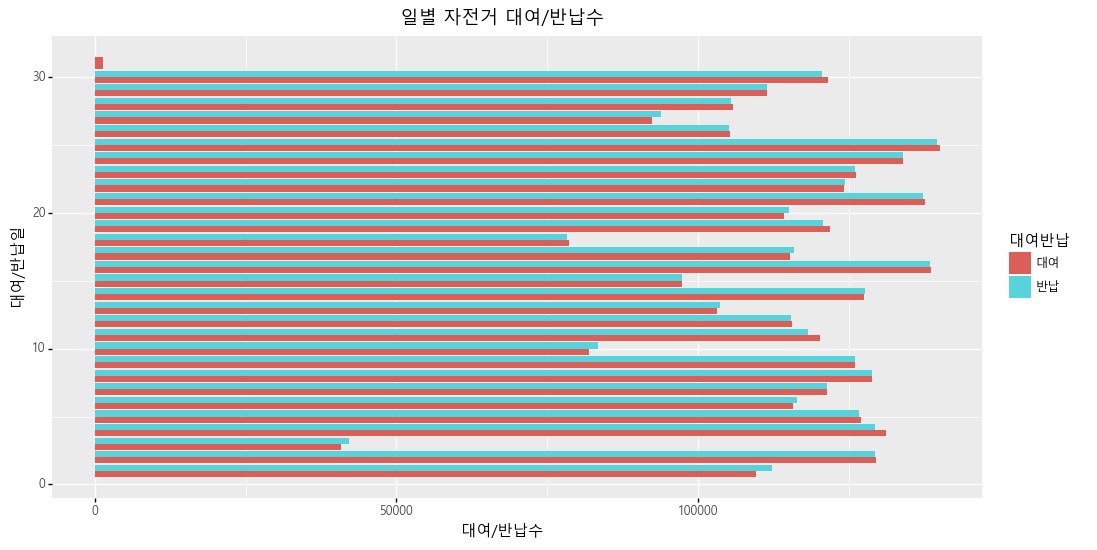

<ggplot: (135518101736)>

In [25]:
(ggplot(df_day) 
       + aes(x='day', y='count', fill='대여반납') 
       + geom_bar(stat='identity',position='dodge')
       + coord_flip()
       + theme(text=element_text(family=fontprop),figure_size=(12,6))
       + labs(x='대여/반납일', y='대여/반납수', title='일별 자전거 대여/반납수')
      )

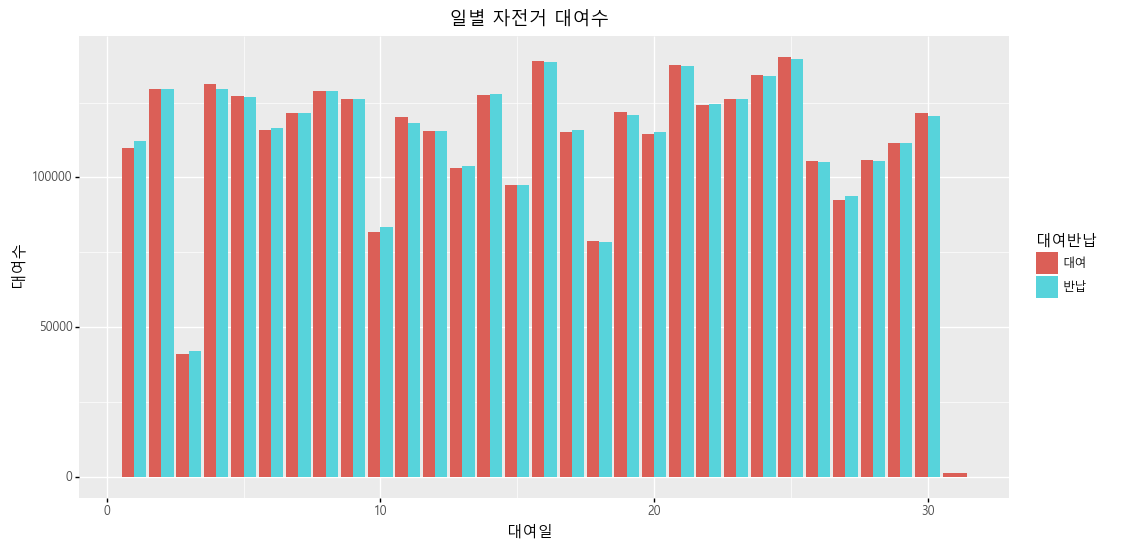

<ggplot: (135528504498)>

In [26]:
(ggplot(df_day)
 + aes(x='day', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + labs(x='대여일', y='대여수', title='일별 자전거 대여수')
 + theme(text=element_text(family=fontprop),
        figure_size=(12,6))
)

## 요일별 대여|반납 현황
* 대여|반납별로 어떤 요일에 주로 대여반납이 되는지 시각화해보기 위해 Tidy Data를 만든다.

In [27]:
df_dow_1 = df['대여요일'].value_counts().reset_index()
df_dow_1.columns = ['dayofweek', 'count']
df_dow_1 = df_dow_1.sort_values('dayofweek')
df_dow_1['대여반납'] = '대여'
print(df_dow_1.shape)

df_dow_2 = df['반납요일'].value_counts().reset_index()
df_dow_2.columns = ['dayofweek', 'count']
df_dow_2 = df_dow_2.sort_values('dayofweek')
df_dow_2['대여반납'] = '반납'
print(df_dow_2.shape)

df_dow = pd.concat([df_dow_1, df_dow_2])
print(df_dow.shape)
df_dow

(7, 3)
(7, 3)
(14, 3)


,dayofweek,count,대여반납
2,0.0,493853,대여
1,1.0,571760,대여
0,2.0,642249,대여
6,3.0,372251,대여
3,4.0,470264,대여
4,5.0,469884,대여
5,6.0,425683,대여
2,0.0,491969,반납
1,1.0,572010,반납
0,2.0,640618,반납


In [45]:
df_dow.head(3)

,dayofweek,count,대여반납
4,0,81933,대여
6,1,53151,대여
2,2,86805,대여


In [46]:
df_dow.tail(3)

,dayofweek,count,대여반납
1,4,88168,반납
0,5,117695,반납
3,6,83169,반납


In [28]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}
df_dow['label'] = df_dow['dayofweek'].replace(weekday_map)

In [65]:
df_dow.tail()

,dayofweek,count,대여반납,label
0,2.0,640618,반납,WED
6,3.0,378053,반납,THU
4,4.0,465716,반납,FRI
3,5.0,468299,반납,SAT
5,6.0,429249,반납,SUN


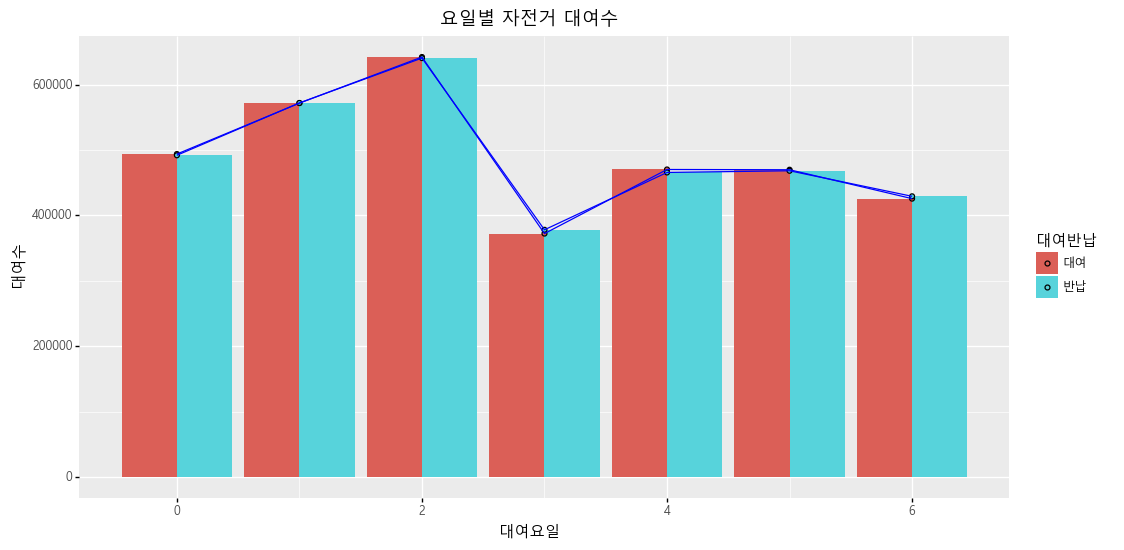

<ggplot: (135534468181)>

In [29]:
(ggplot(df_dow)
 + aes(x='dayofweek', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='대여요일', y='대여수', title='요일별 자전거 대여수')
 + theme(text=element_text(family=fontprop),
        figure_size=(12,6))
)

## 시간대별 대여|반납량

In [30]:
df_hour_1 = df['대여시'].value_counts().reset_index()
df_hour_1.columns = ['hour', 'count']
df_hour_1 = df_hour_1.sort_values('hour')
df_hour_1['대여반납'] = '대여'
df_hour_1.head()

df_hour_2 = df['반납시'].value_counts().reset_index()
df_hour_2.columns = ['hour', 'count']
df_hour_2 = df_hour_2.sort_values('hour')
df_hour_2['대여반납'] = '반납'
df_hour_2.head()

df_hour = pd.concat([df_hour_1, df_hour_2])
df_hour.head()

,hour,count,대여반납
17,0.0,73334,대여
19,1.0,47104,대여
20,2.0,30025,대여
22,3.0,19561,대여
23,4.0,15167,대여


In [51]:
df_hour.tail()

,hour,count,대여반납
1,19,46836,반납
2,20,45713,반납
3,21,45628,반납
4,22,44417,반납
5,23,34927,반납


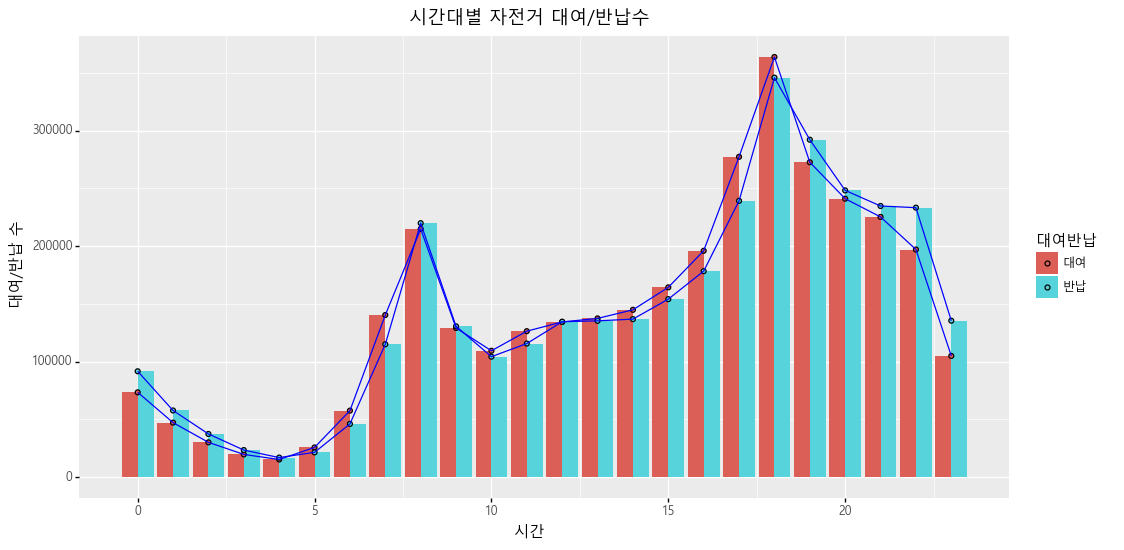

<ggplot: (135533188093)>

In [31]:
(ggplot(df_hour)
 + aes(x='hour', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='시간', y='대여/반납 수', title='시간대별 자전거 대여/반납수')
 + theme(text=element_text(family=fontprop),
        figure_size=(12,6))
)

* 새벽시간대로 갈 수록 대여/반납 수가 줄어든다.
* 출근시간대에는 대여가 반납보다 많다.
* 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
* 오전 11시부터 20시까지는 대여가 반납보다 많다.(대여>반납)
* 21시 이후부터 오전 4시까지는 대여보다 반납이 많다.(대여<반납)

In [32]:
df_minute_1 = df['대여분'].value_counts().reset_index()
df_minute_1.columns = ['minute', 'count']
df_minute_1 = df_minute_1.sort_values('minute')
df_minute_1['대여반납'] = '대여'
print(df_minute_1.shape)

df_minute_2 = df['반납분'].value_counts().reset_index()
df_minute_2.columns = ['minute', 'count']
df_minute_2 = df_minute_2.sort_values('minute')
df_minute_2['대여반납'] = '반납'
print(df_minute_2.shape)

df_minute = pd.concat([df_minute_1, df_minute_2])
print(df_minute.shape)

(60, 3)
(60, 3)
(120, 3)


In [54]:
df_minute.head()

,minute,count,대여반납
57,0,9326,대여
41,1,9601,대여
24,2,9758,대여
28,3,9748,대여
11,4,10037,대여


In [55]:
df_minute.tail()

,minute,count,대여반납
3,55,10369,반납
10,56,10095,반납
11,57,10094,반납
19,58,9882,반납
18,59,9887,반납


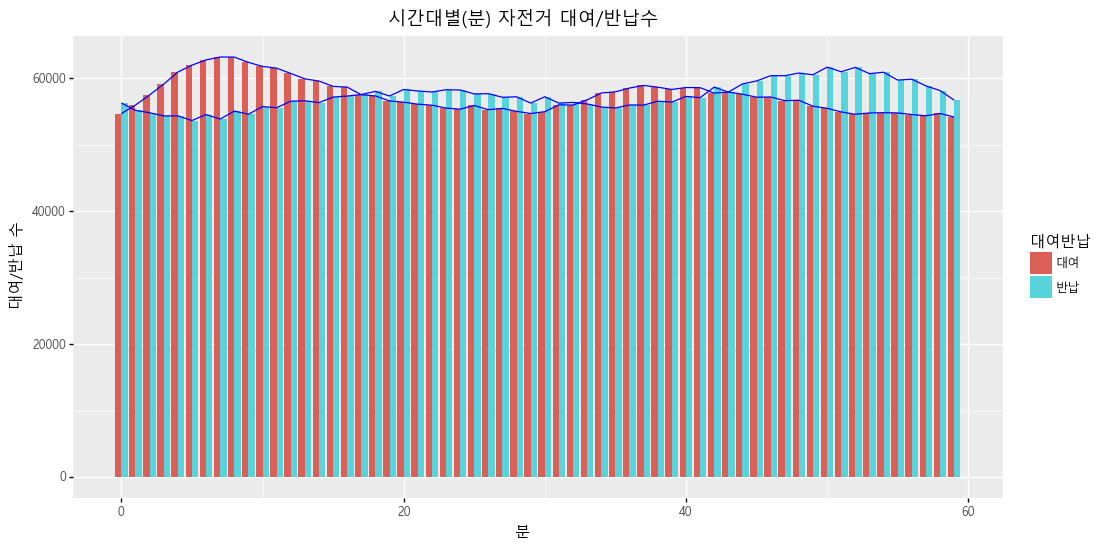

<ggplot: (135515171831)>

In [33]:
(ggplot(df_minute)
 + aes(x='minute', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_line(color='blue')
 + labs(x='분', y='대여/반납 수', title='시간대별(분) 자전거 대여/반납수')
 + theme(text=element_text(family=fontprop),
        figure_size=(12,6))
)

* 대여/반납이 거의 비슷하게 이루어지고 있지만 
* 대여는 0 ~ 20분 사이에 더 많이 일어나며 반납은 40 ~ 60분 사이에 더 많이 일어난다.

## 대여와 반납은 같은 곳에서 이루어지고 있을까?

In [34]:
# 같은대여반납소라는 컬럼을 새로 만들고 대여반납이 같은 곳에서 이루어지고 있는지 여부를 추가한다.
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']

In [35]:
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns = ['일치여부', '대여반납수']
# 같은|다른 반납소별로 대여반납수가 몇 배나 차이가 나는지 확인한다.
location_diff_ratio = df_location_diff['대여반납수'][0]/df_location_diff['대여반납수'][1]
print(location_diff_ratio)
print('같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {0:.2f}배 많다.'.format(location_diff_ratio))
df_location_diff

9.906473727188136
같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 9.91배 많다.


,일치여부,대여반납수
0,False,3129990
1,True,315954


In [36]:
df_location_diff['대여반납수']

0    3129990
1     315954
Name: 대여반납수, dtype: int64

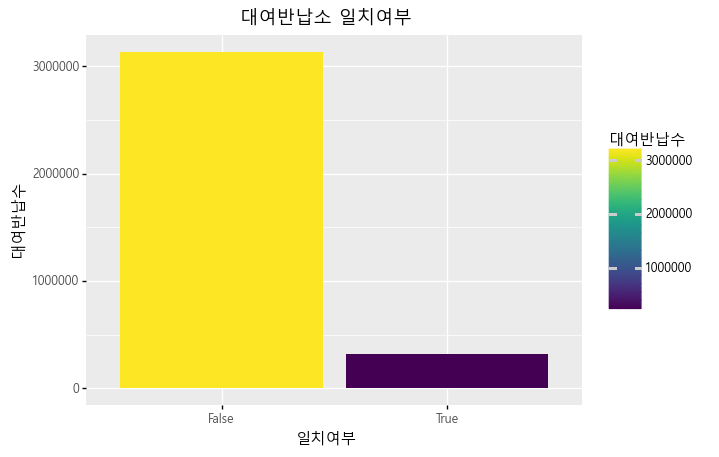

<ggplot: (135470474801)>

In [37]:
# 대여반납수로 fill을 넣어주어 그래프에 색상표현이 되도록 한다.
(ggplot(df_location_diff)
 + geom_col(mapping=aes(x='일치여부', y='대여반납수', fill='대여반납수'))
 + labs(title='대여반납소 일치여부')
 + theme(text=element_text(family=fontprop))
)

같은 곳에서 대여반납을 하는 것보다 다른 곳으로의 대여반납이 훨씬 많은 것을 확인할 수 있다.

In [38]:
df_same_loc = df.loc[df['같은대여반납소'] == True]
df_same_loc.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
9,SPB-34159,2021-05-31 23:30:40,283,아크로타워 스퀘어(영등포시장),0,2021-06-01 00:00:15,283,아크로타워 스퀘어(영등포시장),0,29.0,...,23,30,0,2021.0,6.0,1.0,0.0,0.0,1.0,True
13,SPB-48083,2021-05-31 21:44:25,3549,건영아파트 앞,0,2021-06-01 00:00:22,3549,건영아파트 앞,0,135.0,...,21,44,0,2021.0,6.0,1.0,0.0,0.0,1.0,True
17,SPB-54882,2021-05-31 23:39:18,2732,마곡수명산 1-2단지,0,2021-06-01 00:00:29,2732,마곡수명산 1-2단지,0,21.0,...,23,39,0,2021.0,6.0,1.0,0.0,0.0,1.0,True
19,SPB-53125,2021-05-31 23:35:53,1011,LIGA 아파트 앞,0,2021-06-01 00:00:32,1011,LIGA 아파트 앞,0,24.0,...,23,35,0,2021.0,6.0,1.0,0.0,0.0,1.0,True
38,SPB-46763,2021-05-31 22:10:23,562,군자지하보도 앞,0,2021-06-01 00:00:47,562,군자지하보도 앞,0,110.0,...,22,10,0,2021.0,6.0,1.0,0.0,0.0,1.0,True


In [39]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
df_same_loc['대여대여소명'].value_counts().head(30)

뚝섬유원지역 1번출구 앞              3402
여의나루역 1번출구 앞               3099
마포구민체육센터 앞                 2836
봉림교 교통섬                    1935
옥수역 3번출구                   1639
월드컵공원                      1530
청계천 생태교실 앞                 1505
서울숲 관리사무소                  1409
독산보도육교 앞 자전거 보관소           1373
당산육갑문                      1369
응봉역 1번출구                   1238
신대방역 2번 출구                 1146
동방1교                       1146
신정교 하부                     1112
한신16차아파트 119동 앞            1086
흑석역 1번출구                    951
올림픽공원역 3번출구                 889
진영상운 앞 중랑천 변                844
몽촌토성역 1번출구 옆                816
염창나들목                       765
홍은사거리                       736
보문2교                        697
한성백제역 2번 출구                 695
고속터미널역 8-1번, 8-2번 출구 사이     685
겸재교 진입부                     674
선유도역 3번출구 앞                 673
도림천 신화교                     672
국민일보 앞                      649
보라매공원 보도육교                  647
정곡나들목                       644
Name: 대여대여소명, dtype: int64

* 같은 곳에서 대여반납이 이루어지는 대여소들은 한강주변이나 공원 주변에 위치한 것을 확인해 볼 수 있다.

## 같은|다른 대여소에서 대여가 되는 자전거의 평균 이용시간
### 같은 대여반납소

In [40]:
same_loc_mean_time = df_same_loc['이용시간'].mean()
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)
df_same_mean = df_same_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간'].mean().reset_index()
df_same_mean.head()

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  50.03092855289061


,대여대여소명,반납대여소명,이용시간
0,(구)신한은행 중랑교지점,(구)신한은행 중랑교지점,48.211823
1,(시립)고덕평생학습관,(시립)고덕평생학습관,55.250000
2,(재)FITI시험연구원,(재)FITI시험연구원,42.037634
3,3호선 매봉역 3번출구앞,3호선 매봉역 3번출구앞,43.782609
4,419민주묘지 입구사거리,419민주묘지 입구사거리,44.897059


In [41]:
df_same_count = df_same_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_same_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_same_count.head()

,대여대여소명,반납대여소명,이용횟수
0,(구)신한은행 중랑교지점,(구)신한은행 중랑교지점,203
1,(시립)고덕평생학습관,(시립)고덕평생학습관,28
2,(재)FITI시험연구원,(재)FITI시험연구원,186
3,3호선 매봉역 3번출구앞,3호선 매봉역 3번출구앞,92
4,419민주묘지 입구사거리,419민주묘지 입구사거리,68


In [42]:
df_same_loc2 = df_same_mean.merge(df_same_count, left_on=['대여대여소명', '반납대여소명'],\
                                  right_on=['대여대여소명', '반납대여소명'])
df_same_loc2.head()

,대여대여소명,반납대여소명,이용시간,이용횟수
0,(구)신한은행 중랑교지점,(구)신한은행 중랑교지점,48.211823,203
1,(시립)고덕평생학습관,(시립)고덕평생학습관,55.250000,28
2,(재)FITI시험연구원,(재)FITI시험연구원,42.037634,186
3,3호선 매봉역 3번출구앞,3호선 매봉역 3번출구앞,43.782609,92
4,419민주묘지 입구사거리,419민주묘지 입구사거리,44.897059,68


In [43]:
df_same_loc2.sort_values(by='이용시간', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간,이용횟수
2150,창신역2번 출구,창신역2번 출구,192.000000,4
836,메뚜기다리,메뚜기다리,128.000000,1
2265,핀란드 타워앞,핀란드 타워앞,119.000000,1
1206,서울 논현동우체국 앞,서울 논현동우체국 앞,113.500000,18
204,개화광역환승센터,개화광역환승센터,112.741935,31
1536,신사로입구,신사로입구,110.000000,1
2176,청계산입구역 2번출구,청계산입구역 2번출구,101.200000,5
1967,이화여대 인문관 인근,이화여대 인문관 인근,94.296296,27
506,논골사거리(금호도서관 입구),논골사거리(금호도서관 입구),94.142857,7
1201,서빙고역 광장(1번출구),서빙고역 광장(1번출구),93.421053,19


In [44]:
# 이용횟수가 많은 곳의 평균 이용시간
df_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간,이용횟수
713,뚝섬유원지역 1번출구 앞,뚝섬유원지역 1번출구 앞,54.482363,3402
1686,여의나루역 1번출구 앞,여의나루역 1번출구 앞,61.818006,3099
808,마포구민체육센터 앞,마포구민체육센터 앞,59.817348,2836
1020,봉림교 교통섬,봉림교 교통섬,58.314212,1935
1782,옥수역 3번출구,옥수역 3번출구,59.189750,1639
1870,월드컵공원,월드컵공원,61.584967,1530
2178,청계천 생태교실 앞,청계천 생태교실 앞,51.186047,1505
1245,서울숲 관리사무소,서울숲 관리사무소,53.650106,1409
631,독산보도육교 앞 자전거 보관소,독산보도육교 앞 자전거 보관소,62.628551,1373
541,당산육갑문,당산육갑문,60.498904,1369


<AxesSubplot:ylabel='Frequency'>

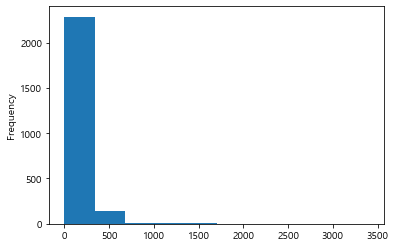

In [45]:
df_same_loc2['이용횟수'].plot.hist()

### 다른 대여|반납소

In [46]:
df_diff_loc = df.loc[df['같은대여반납소'] == False]
df_diff_loc.shape

(3129990, 24)

In [47]:
diff_loc_mean_time = df_diff_loc['이용시간'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', df_diff_loc['이용시간'].mean())
df_diff_mean = df_diff_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간'].mean().reset_index()
df_diff_count = df_diff_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_diff_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_diff_loc2 = df_diff_mean.merge(df_diff_count, left_on=['대여대여소명', '반납대여소명'],\
                                  right_on=['대여대여소명', '반납대여소명'])
df_diff_loc2.sort_values(by='이용시간', ascending=False).head(10)

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  23.522763098284663


,대여대여소명,반납대여소명,이용시간,이용횟수
228307,센서텍㈜,"금천구청 앞 자?喚키탠〈?,0""",17823.34,1
73747,"남부법원검찰청 교?湯?,0""",0,12310.00,1
332967,잠원역 3번-4번 출구사이,"삼전역 1?萍瘦?,0""",10280.00,1
334496,"장안동위더스?舛?,0""",0,9826.45,1
98403,"도봉산광역환승센?槁?,0""",0,9297.35,1
26106,"강변역 4번출구 ??,0""",0,7310.00,1
199289,서울문화재단 앞,"미아동 한국?晥째翩?,0""",7290.00,1
299056,"외대앞역 4번출??,0""",0,6659.44,1
119965,"롯데리아 개?泰±?,0""",0,5885.57,1
300329,용두동 사거리,"꿈마루어린이도서관 ??,0""",5697.90,1


In [48]:
df_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간,이용횟수
166861,봉림교 교통섬,동방1교,18.696947,1343
106514,동방1교,봉림교 교통섬,18.518219,1235
210218,서울축산농협(장안지점),장한평역 1번출구 (국민은행앞),6.996051,1013
116047,뚝섬유원지역 1번출구 앞,건대입구역 사거리(롯데백화점),16.899897,969
335701,장한평역 1번출구 (국민은행앞),서울축산농협(장안지점),9.418033,854
225168,성수역3번출구,이마트 버스정류소 옆,8.593200,853
34472,건대입구역 사거리(롯데백화점),뚝섬유원지역 1번출구 앞,24.768293,820
334678,장안동위더스빌옆,장한평역 1번출구 (국민은행앞),8.061111,720
29008,강서세무서 앞,마곡나루역 5번출구 뒤편,4.201439,695
44881,과기대 입구(우),서울과학기술대학교(어학교육원),9.347889,687


In [49]:
rent_mean_time = same_loc_mean_time - diff_loc_mean_time
print('같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 \
다른 대여소의 대여반납 이용시간보다 {:,.2f} 분 많다.'.format(rent_mean_time))

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 26.51 분 많다.


* 이용횟수가 많은 대여소라고 해서 평균이용시간이 평균보다 높지는 않다.
* 관련기사
    * ['따릉이' 타고 가장 많이 다닌 경로는? - 통플러스](http://news.tongplus.com/site/data/html_dir/2018/10/24/2018102402585.html)
    * [[ONE SHOT] 따릉이, ‘이곳’서 가장 많이 빌리고 ‘여기’서 가장 많이 탄다](https://news.joins.com/article/23003297)

## 해당 기간동안 가장 많이 이용된 자전거는 몇 회 대여 되었을까?

In [50]:
df['자전거번호'].describe()

count       3445944
unique        25929
top       SPB-48015
freq            379
Name: 자전거번호, dtype: object

In [51]:
bike_describe = df['자전거번호'].describe()
print('대여된 자전거 수 :', bike_describe[1]) #unique
print('가장 많이 대여된 자전거 번호 :', bike_describe[2]) #top
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3]) #freq
bike_describe

대여된 자전거 수 : 25929
가장 많이 대여된 자전거 번호 : SPB-48015
가장 많이 대여된 자전거의 대여횟수 : 379


count       3445944
unique        25929
top       SPB-48015
freq            379
Name: 자전거번호, dtype: object

In [53]:
bike_rent_counts = df['자전거번호'].value_counts().reset_index()
bike_rent_counts.columns = ['자전거번호', '대여수']
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())
bike_rent_counts.head()
print(bike_rent_counts.shape)

해당 기간동안 자전거 하나당 평균 대여 수: 132.89922480620154
자전거 하나당 가장 많이 대여된 횟수: 379
자전거 하나당 가장 적게 대여된 횟수: 1
(25929, 2)


In [93]:
bike_rent_counts.tail()

,자전거번호,대여수
25924,SPB-31501,1
25925,SPB-32044,1
25926,SPB-36573,1
25927,SPB-08505,1
25928,SPB-45832,1


<AxesSubplot:ylabel='Frequency'>

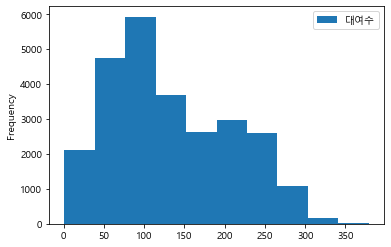

In [54]:
bike_rent_counts.plot.hist()

In [55]:
# 가장 많이 대여된 자전거의 대여이력
most_bike_df = df.loc[df['자전거번호'] == bike_describe[2]]
most_bike_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
16018,SPB-48015,2021-06-01 09:12:41,1610,화랑대역 2번출구 앞,0,2021-06-01 09:23:58,1655,공릉1단지아파트,0,11.0,...,9,12,1,2021.0,6.0,1.0,9.0,23.0,1.0,False
24951,SPB-48015,2021-06-01 11:23:13,1655,공릉1단지아파트,0,2021-06-01 11:47:25,1674,서울북부고용센터앞,0,24.0,...,11,23,1,2021.0,6.0,1.0,11.0,47.0,1.0,False
30421,SPB-48015,2021-06-01 12:12:47,1674,서울북부고용센터앞,0,2021-06-01 12:57:21,1429,장안중학교,0,44.0,...,12,12,1,2021.0,6.0,1.0,12.0,57.0,1.0,False
31738,SPB-48015,2021-06-01 13:07:24,1429,장안중학교,0,2021-06-01 13:12:17,1404,동일로 지하차도,0,4.0,...,13,7,1,2021.0,6.0,1.0,13.0,12.0,1.0,False
37538,SPB-48015,2021-06-01 14:04:27,1404,동일로 지하차도,0,2021-06-01 14:26:21,602,장안동 사거리,0,21.0,...,14,4,1,2021.0,6.0,1.0,14.0,26.0,1.0,False


* 같은 자전거가 동일 시간대에 여러번 대여된 이력을 확인 할 수 있다. 좀 더 확인이 필요하다.

In [56]:
most_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 16018 to 3436063
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   자전거번호    379 non-null    object        
 1   대여일시     379 non-null    datetime64[ns]
 2   대여대여소번호  379 non-null    int64         
 3   대여대여소명   379 non-null    object        
 4   대여거치대    379 non-null    object        
 5   반납일시     379 non-null    datetime64[ns]
 6   반납대여소번호  379 non-null    object        
 7   반납대여소명   379 non-null    object        
 8   반납거치대    379 non-null    int64         
 9   이용시간     379 non-null    float64       
 10  이용거리     379 non-null    float64       
 11  대여년      379 non-null    int64         
 12  대여월      379 non-null    int64         
 13  대여일      379 non-null    int64         
 14  대여시      379 non-null    int64         
 15  대여분      379 non-null    int64         
 16  대여요일     379 non-null    int64         
 17  반납년      379 non-null    fl

In [57]:
most_bike_df['대여대여소번호'].value_counts().head()

1184    6
2621    6
1277    4
1020    4
1191    4
Name: 대여대여소번호, dtype: int64

In [58]:
most_bike_df[most_bike_df['대여대여소번호'] == 1184]['대여일시'].value_counts()

2021-06-15 20:09:15    1
2021-06-12 00:33:48    1
2021-06-06 02:17:40    1
2021-06-10 16:56:10    1
2021-06-12 07:14:51    1
2021-06-16 11:55:28    1
Name: 대여일시, dtype: int64

In [59]:
most_bike_df[most_bike_df['대여대여소번호'] == 1184]['반납일시'].value_counts()

2021-06-16 11:57:59    1
2021-06-12 07:33:37    1
2021-06-15 20:34:52    1
2021-06-10 17:09:36    1
2021-06-12 00:46:40    1
2021-06-06 02:42:07    1
Name: 반납일시, dtype: int64

In [60]:
most_bike_df['대여대여소명'].value_counts()

마곡13단지           6
한성백제역 2번 출구      6
마곡역 교차로(NH농협)    4
구로중학교앞           4
강동경찰서            4
                ..
LIGA 아파트 앞       1
이태원지하보도          1
신방화역 8번출구        1
송파도서관            1
석촌역 8번출구         1
Name: 대여대여소명, Length: 268, dtype: int64

In [61]:
rent_station = most_bike_df['대여대여소명'].unique()
rent_station

array(['화랑대역 2번출구 앞', '공릉1단지아파트', '서울북부고용센터앞', '장안중학교', '동일로 지하차도',
       '장안동 사거리', '청계천 생태교실 앞', '맥스타일 앞', '광화문역 5번출구', '성균관대입구사거리(맥도날드)',
       '종로3가역 8번출구', '훈련원공원주차장 앞', '청계천 영도교', '청계8가사거리 부근', '서울시설공단 앞',
       '왕십리교회옆', '청계7가 사거리', '국민은행 종암동지점 앞', '건국대학교 정문 앞', '중앙농협(자양동)',
       '건대입구역 사거리(롯데백화점)', '광진구청 앞', '성수역3번출구', '자양나들목', '뚝섬유원지역 1번출구 앞',
       '청담역 13번 출구 앞', '건대입구역 5번출구 뒤', '영동대교 북단', '구의문주차장 앞',
       '성수2가1동 공영주차장 인근', '용산역 맞은편', '장승배기역 5번출구', '노량진근린공원 대방공원',
       '보라매역 8번출구', '래미안에스티움 앞 (신풍로)', '보라매sk뷰', '신도림역 1번 출구 앞',
       '한마을아파트 정문상가', '서울시 도로환경관리센터', '영도초등학교', '목동5단지아파트 501동', '정곡나들목',
       '신방화역환승주차장', '발산역 6번 출구 뒤', '볏골공원', '꿈돌이공원 앞', '마곡역 교차로(NH농협)',
       '마곡13단지', '가양3동 주민센터', '가양역 8번출구', '그랜드아이파크아파트 앞', '등촌서광아파트',
       '여의도중학교 옆', '등촌역 1번출구옆', '염창동 새마을금고 건너편 (모닝글로리)', '황금내근린공원',
       '증미역 3번출구뒤(등촌두산위브센티움오피스텔)', '스타벅스앞', '염창동 한마음아파트앞(염창동 빛나는 음악학원앞)',
       '강서구청사거리(SH타워)', '홈플러스(강서점)', '강서구청사거리(부민병원)', 'KC 대학교',
       '가양레포츠센터앞', '(재)FIT

In [62]:
# 대여소명 앞에 들어간 공백을 제거합니다.
bike_move = []
for s in rent_station:
    bike_move.append(s)
    
bike_move

['화랑대역 2번출구 앞',
 '공릉1단지아파트',
 '서울북부고용센터앞',
 '장안중학교',
 '동일로 지하차도',
 '장안동 사거리',
 '청계천 생태교실 앞',
 '맥스타일 앞',
 '광화문역 5번출구',
 '성균관대입구사거리(맥도날드)',
 '종로3가역 8번출구',
 '훈련원공원주차장 앞',
 '청계천 영도교',
 '청계8가사거리 부근',
 '서울시설공단 앞',
 '왕십리교회옆',
 '청계7가 사거리',
 '국민은행 종암동지점 앞',
 '건국대학교 정문 앞',
 '중앙농협(자양동)',
 '건대입구역 사거리(롯데백화점)',
 '광진구청 앞',
 '성수역3번출구',
 '자양나들목',
 '뚝섬유원지역 1번출구 앞',
 '청담역 13번 출구 앞',
 '건대입구역 5번출구 뒤',
 '영동대교 북단',
 '구의문주차장 앞',
 '성수2가1동 공영주차장 인근',
 '용산역 맞은편',
 '장승배기역 5번출구',
 '노량진근린공원 대방공원',
 '보라매역 8번출구',
 '래미안에스티움 앞 (신풍로)',
 '보라매sk뷰',
 '신도림역 1번 출구 앞',
 '한마을아파트 정문상가',
 '서울시 도로환경관리센터',
 '영도초등학교',
 '목동5단지아파트 501동',
 '정곡나들목',
 '신방화역환승주차장',
 '발산역 6번 출구 뒤',
 '볏골공원',
 '꿈돌이공원 앞',
 '마곡역 교차로(NH농협)',
 '마곡13단지',
 '가양3동 주민센터',
 '가양역 8번출구',
 '그랜드아이파크아파트 앞',
 '등촌서광아파트',
 '여의도중학교 옆',
 '등촌역 1번출구옆',
 '염창동 새마을금고 건너편 (모닝글로리)',
 '황금내근린공원',
 '증미역 3번출구뒤(등촌두산위브센티움오피스텔)',
 '스타벅스앞',
 '염창동 한마음아파트앞(염창동 빛나는 음악학원앞)',
 '강서구청사거리(SH타워)',
 '홈플러스(강서점)',
 '강서구청사거리(부민병원)',
 'KC 대학교',
 '가양레포츠센터앞',
 '(재)FITI시험연구원',
 '서울식물원 잔디마당 앞',
 '마곡엠밸리6_7단지 마

In [63]:
stations = pd.read_csv('data/seoul_bike/bike_station.csv')
print(stations.shape)
stations.head()

(2480, 3)


,대여소,경도,위도
0,위트콤공장,0.000000,0.000000
1,망원역 1번출구 앞,126.910629,37.555649
2,망원역 2번출구 앞,126.910835,37.554951
3,합정역 1번출구 앞,126.914986,37.550629
4,합정역 5번출구 앞,126.914825,37.550007


In [64]:
bike_move_df = pd.DataFrame(bike_move)
bike_move_df.columns = ['대여소']
print(bike_move_df.shape)
bike_move_df.head()

(268, 1)


,대여소
0,화랑대역 2번출구 앞
1,공릉1단지아파트
2,서울북부고용센터앞
3,장안중학교
4,동일로 지하차도


In [65]:
bike_move_df = bike_move_df.merge(stations, left_on='대여소', right_on='대여소', how='left')
bike_move_df.shape

(268, 3)

In [66]:
bike_move_df.head()

,대여소,경도,위도
0,화랑대역 2번출구 앞,127.083641,37.620369
1,공릉1단지아파트,127.070160,37.631111
2,서울북부고용센터앞,127.058083,37.653549
3,장안중학교,127.080002,37.599957
4,동일로 지하차도,127.080032,37.595299


In [67]:
bike_move_df.isnull().sum()

대여소    0
경도     6
위도     6
dtype: int64

## 가장 많이 대여된 자전거가 거쳐간 대여소

In [69]:
# 정보가 없는 대여소
bike_move_df.loc[bike_move_df['경도'].isnull()]

,대여소,경도,위도
16,청계7가 사거리,NaN,NaN
26,건대입구역 5번출구 뒤,NaN,NaN
73,수명중?고교,NaN,NaN
102,뒷벌공원 옆,NaN,NaN
125,양천향교역 7번출구앞,NaN,NaN
191,역삼서초삼성 세무서 앞 (역삼빌딩 앞),NaN,NaN


In [70]:
bike_move_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            258, 259, 260, 261, 262, 263, 264, 265, 266, 267],
           dtype='int64', length=268)

In [91]:
#!pip install folium

In [71]:
# 지도 표현을 위해 folium 을 import 한다.
# 데이터 프레임에서 위도와 경도의 평균값을 구한다. 이 값으로 지도의 중심이 될 좌표를 정한다.
# zoom_start는 지도를 얼마나 확대해서 볼것인지다.
# tiles는 지도의 스타일이다.
import folium 

geo_df = bike_move_df
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    if geo_df.loc[n, '위도'] > 0 and geo_df.loc[n, '경도'] > 0 :
        loc_name = geo_df.loc[n, '대여소']

        icon_color = 'red'
        folium.Circle(
            location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
            popup=loc_name,
            radius=50,
            color=icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)
    
map